In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# import
import os
import time
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.metrics import accuracy_score,confusion_matrix, make_scorer, recall_score, f1_score, roc_auc_score
from imblearn.ensemble import EasyEnsembleClassifier
import warnings
warnings.filterwarnings('ignore')



### **資料處理**

In [ ]:
# load data
df = pd.read_csv('/content/drive/MyDrive/dataset/heart_disease_health_indicators_BRFSS2015.csv')
df.head()

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [ ]:
# check data
data = len(df)
nan_count = df.isnull().sum().sum()
print('資料量：',data)
print('空值：',nan_count)

資料量： 81884
空值： 0


In [ ]:
df = df.fillna(df.mean())
# df = df.dropna()

In [ ]:
print('0:',df[df['HeartDiseaseorAttack'] == 0].shape[0])
print('1:',df[df['HeartDiseaseorAttack'] == 1].shape[0])

0: 74342
1: 7542


In [ ]:
# 選擇目標變量和特徵變量
y = df['HeartDiseaseorAttack']
X = df.drop(['HeartDiseaseorAttack'], axis=1)


In [ ]:
# 分割數據集為訓練集和測試集
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)
print('Dimensions: \n x_train:{} \n x_test{} \n y_train{} \n y_test{}'.format(x_train.shape, x_test.shape, y_train.shape, y_test.shape))

Dimensions: 
 x_train:(65507, 21) 
 x_test(16377, 21) 
 y_train(65507,) 
 y_test(16377,)


In [ ]:
# @title
# 處理缺失值 mean
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean') # 可以是 'median', 'most_frequent' 等
# 選擇目標變量和特徵變量
y = df['HeartDiseaseorAttack']
X = df.drop(['HeartDiseaseorAttack'], axis=1)

# 補齊 X 中的空值
X = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)


In [ ]:
# @title
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy='auto',  # 自动平衡所有类
              k_neighbors=5,             # 使用5个最近邻
              random_state=7,           # 确保可重复性
              n_jobs=-1)
x_train, y_train = smote.fit_resample(x_train, y_train)

### **DecisionTreeClassifier**

In [ ]:
# 使用決策樹作為分類器
classifier = DecisionTreeClassifier(random_state=42)

In [ ]:
# 訓練決策樹模型
classifier.fit(x_train, y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
# 使用測試集進行預測
y_pred = classifier.predict(x_test)

t_accuracy = accuracy_score(y_test, y_pred)
# 計算召回率並儲存到變數 (假設為二分類問題)
t_recall = recall_score(y_test, y_pred, average='binary')
tt_recall = recall_score(y_test, y_pred, average=None)

# 計算F1分數並儲存到變數 (假設為二分類問題)
t_f1 = f1_score(y_test, y_pred, average='binary')

# 打印準確率、召回率和F1分數的值
print(f"Accuracy: {t_accuracy:.2f}")
print(f"Recall: {t_recall:.2f}")
print(f"Recall for 'No': {tt_recall[0]:.2f}")
print(f"Recall for 'yes': {tt_recall[1]:.2f}")
print(f"F1 Score: {t_f1:.2f}")

Accuracy: 0.85
Recall: 0.28
Recall for 'No': 0.91
Recall for 'yes': 0.28
F1 Score: 0.26


In [ ]:
from prettytable import PrettyTable
from sklearn.metrics import f1_score, confusion_matrix,balanced_accuracy_score,matthews_corrcoef,precision_score
import numpy as np

y_pred = classifier.predict(x_test)
# 假设y_test和y_pred是你的真实标签和预测标签
# 根据y_test和y_pred计算所有指标

# 创建一个PrettyTable对象
pt = PrettyTable()

# 添加表头
pt.field_names = ["Class", "Precision", "Recall", "F1-score", "Support"]

# 分别计算每个类别的性能指标
for i in [0,1]:  # 假设有两个类别，0和1
    precision = precision_score(y_test, y_pred, pos_label=i, average='binary')
    recall = recall_score(y_test, y_pred, pos_label=i, average='binary')
    f1 = f1_score(y_test, y_pred, pos_label=i, average='binary')
    support = (y_test == i).sum()
    pt.add_row([i, f"{precision:.2f}", f"{recall:.2f}", f"{f1:.2f}", support])

# 打印分类报告
print(pt)

# 打印其他总体指标
b_accuracy = accuracy_score(y_test, y_pred)
b_balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
b_mcc = matthews_corrcoef(y_test, y_pred)

print(f"Accuracy: {b_accuracy:.2f}")
print(f"Balanced Accuracy: {b_balanced_accuracy:.2f}")
print(f"Matthews Correlation Coefficient: {b_mcc:.2f}")


+-------+-----------+--------+----------+---------+
| Class | Precision | Recall | F1-score | Support |
+-------+-----------+--------+----------+---------+
|   0   |    0.93   |  0.91  |   0.92   |  14859  |
|   1   |    0.24   |  0.28  |   0.26   |   1518  |
+-------+-----------+--------+----------+---------+
Accuracy: 0.85
Balanced Accuracy: 0.59
Matthews Correlation Coefficient: 0.18


### **EasyEnsembleClassifier**

In [ ]:
def tn(y_true, y_pred): return confusion_matrix(y_true, y_pred)[0, 0]
def fp(y_true, y_pred): return confusion_matrix(y_true, y_pred)[0, 1]
def fn(y_true, y_pred): return confusion_matrix(y_true, y_pred)[1, 0]
def tp(y_true, y_pred): return confusion_matrix(y_true, y_pred)[1, 1]

In [ ]:
scorers = {
    'Accuracy': 'accuracy',
    'roc_auc': 'roc_auc',
    'Sensitivity':'recall',
    'precision':'precision',
    'tp': make_scorer(tp),
    'tn': make_scorer(tn),
    'fp': make_scorer(fp),
    'fn': make_scorer(fn)
}

In [ ]:
# from sklearn.linear_model import LogisticRegression
# logreg = LogisticRegression()
ez = EasyEnsembleClassifier(n_estimators=10,random_state=7)#base_estimator=logreg,
ez.fit(x_train, y_train)#ez.fit(x_train, y_train)

EasyEnsembleClassifier(random_state=7)

In [ ]:
from prettytable import PrettyTable
from sklearn.metrics import f1_score, confusion_matrix,balanced_accuracy_score,matthews_corrcoef,precision_score
import numpy as np

y_pred = ez.predict(x_test)

# PrettyTable
pt = PrettyTable()

# 添加表头
pt.field_names = ["Class", "Precision", "Recall", "F1-score", "Support"]

# 分别计算每个类别的性能指标
for i in [0,1]:  # 假设有两个类别，0和1
    precision = precision_score(y_test, y_pred, pos_label=i, average='binary')
    recall = recall_score(y_test, y_pred, pos_label=i, average='binary')
    f1 = f1_score(y_test, y_pred, pos_label=i, average='binary')
    support = (y_test == i).sum()
    pt.add_row([i, f"{precision:.2f}", f"{recall:.2f}", f"{f1:.2f}", support])

# 打印分类报告
print(pt)

# 打印其他总体指标
ez_accuracy = accuracy_score(y_test, y_pred)
ez_balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
ez_mcc = matthews_corrcoef(y_test, y_pred)
ez_precision = precision_score(y_test, y_pred, average='binary')
ez_recall = recall_score(y_test, y_pred, average='binary')
ez_f1 = f1_score(y_test, y_pred,average='binary')
# 手动计算G-mean
def gmean_manual(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    sensitivity = cm[1, 1] / (cm[1, 0] + cm[1, 1])
    specificity = cm[0, 0] / (cm[0, 0] + cm[0, 1])
    return np.sqrt(sensitivity * specificity)

ez_gmean = gmean_manual(y_test, y_pred)

print(f"Accuracy: {ez_accuracy:.2f}")
print(f"Balanced Accuracy: {ez_balanced_accuracy:.2f}")
print(f"Matthews Correlation Coefficient: {ez_mcc:.2f}")
print(f"Recall: {ez_recall:.2f}")
print(f"Precision: {ez_precision:.2f}")
print(f"F1-score: {ez_f1:.2f}")
print(f"gmean: {ez_gmean:.2f}")



+-------+-----------+--------+----------+---------+
| Class | Precision | Recall | F1-score | Support |
+-------+-----------+--------+----------+---------+
|   0   |    0.97   |  0.75  |   0.85   |  14859  |
|   1   |    0.24   |  0.78  |   0.37   |   1518  |
+-------+-----------+--------+----------+---------+
Accuracy: 0.76
Balanced Accuracy: 0.77
Matthews Correlation Coefficient: 0.34
Recall: 0.78
Precision: 0.24
F1-score: 0.37
gmean: 0.77


In [ ]:
# @title
# 使用predict_proba获得属于正类的概率
probabilities = ez.predict_proba(x_test)[:, 1]

# 设置阈值
threshold = 0.6

# 根据阈值调整预测结果：如果正类的概率大于或等于0.4，则预测为正类（1），否则为负类（0）
y_pred = (probabilities >= threshold).astype(int)

In [ ]:
# @title
# 使用predict_proba获得属于正类的概率
probabilities = ez.predict_proba(x_test)[:, 1]

# 定义一个函数来根据不同的阈值计算精确率和召回率
def calculate_metrics(y_true, probabilities, threshold):
    # 根据阈值调整预测结果
    predictions = (probabilities >= threshold).astype(int)

    # 计算精确率和召回率
    precision = precision_score(y_true, predictions)
    recall = recall_score(y_true, predictions)

    return precision, recall

# 尝试不同的阈值
thresholds = np.arange(0.1, 1, 0.1)
for threshold in thresholds:
    precision, recall = calculate_metrics(y_test, probabilities, threshold)
    print(f"Threshold: {threshold:.1f}, Precision: {precision:.2f}, Recall: {recall:.2f}")

In [ ]:
from sklearn.metrics import accuracy_score, balanced_accuracy_score, recall_score, precision_score

y_pred = ez.predict(x_test)

ez_accuracy = accuracy_score(y_test, y_pred)
ez_balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
ez_recall = recall_score(y_test, y_pred, average='binary')
ez_recall2 = recall_score(y_test, y_pred, average=None)
ez_precision = precision_score(y_test, y_pred, average='binary')
ez_f1 = f1_score(y_test, y_pred, average='binary')
ez_roc_auc = roc_auc_score(y_test, y_pred)

# 手动计算G-mean
def gmean_manual(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    sensitivity = cm[1, 1] / (cm[1, 0] + cm[1, 1])
    specificity = cm[0, 0] / (cm[0, 0] + cm[0, 1])
    return np.sqrt(sensitivity * specificity)

ez_gmean = gmean_manual(y_test, y_pred)
ez_mcc = matthews_corrcoef(y_test, y_pred)

# 打印结果
print('Easy Ensemble result : \n ')
print(f"Accuracy: {ez_accuracy:.2f}")
print(f"Balanced Accuracy: {ez_balanced_accuracy:.2f}")
print(f"Recall: {ez_recall:.2f}")
# print(f"Recall for yes: {ez_recall2[1]:.2f}")
# print(f"Recall for no: {ez_recall2[0]:.2f}")
print(f"Precision: {ez_precision:.2f}")
print(f"G-Mean: {ez_gmean:.2f}")
print(f"ROC AUC: {ez_roc_auc:.2f}")
print(f"F1 Score: {ez_f1:.2f}")
print("Matthews Correlation Coefficient:", ez_mcc)

Easy Ensemble result : 
 
Accuracy: 0.76
Balanced Accuracy: 0.77
Recall: 0.79
Precision: 0.25
G-Mean: 0.77
ROC AUC: 0.77
F1 Score: 0.38
Matthews Correlation Coefficient: 0.34422100852642534


In [ ]:
#change this name here to change the print name
classifier_name = 'Easy Ensemble'

start_ts=time.time()
#try swapping out the classifier for random forest instead
#clf = RandomForestClassifier(n_estimators=200, max_depth=None, min_samples_split=3,criterion='entropy', class_weight='balanced', random_state=random_state)
clf = EasyEnsembleClassifier(n_estimators=10)
scores = cross_validate(clf, X, y, scoring=scorers, cv=5)

Sensitivity = round(scores['test_tp'].mean() / (scores['test_tp'].mean() + scores['test_fn'].mean()),3)*100   #TP/(TP+FN) also recall
Specificity = round(scores['test_tn'].mean() / (scores['test_tn'].mean() + scores['test_fp'].mean()),3)*100    #TN/(TN+FP)
PPV = round(scores['test_tp'].mean() / (scores['test_tp'].mean() + scores['test_fp'].mean()),3)*100           #PPV = tp/(tp+fp) also precision
NPV = round(scores['test_tn'].mean() / (scores['test_fn'].mean() + scores['test_tn'].mean()),3)*100           #TN(FN+TN)

scores_Acc = scores['test_Accuracy']
print(f"{classifier_name} Acc: %0.2f (+/- %0.2f)" % (scores_Acc.mean(), scores_Acc.std() * 2))
scores_AUC = scores['test_roc_auc']                                                                     #Only works with binary classes, not multiclass
print(f"{classifier_name} AUC: %0.2f (+/- %0.2f)" % (scores_AUC.mean(), scores_AUC.std() * 2))
scores_sensitivity = scores['test_Sensitivity']                                                                     #Only works with binary classes, not multiclass
print(f"{classifier_name} Recall: %0.2f (+/- %0.2f)" % (scores_sensitivity.mean(), scores_sensitivity.std() * 2))
scores_precision = scores['test_precision']                                                                     #Only works with binary classes, not multiclass
print(f"{classifier_name} Precision: %0.2f (+/- %0.2f)" % (scores_precision.mean(), scores_precision.std() * 2))
print(f"{classifier_name} Sensitivity = ", Sensitivity, "%")
print(f"{classifier_name} Specificity = ", Specificity, "%")
print(f"{classifier_name} PPV = ", PPV, "%")
print(f"{classifier_name} NPV = ", NPV, "%")

print("CV Runtime:", time.time()-start_ts)

### **MEBoost**

In [ ]:
import numpy as np
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import (AllKNN, ClusterCentroids, CondensedNearestNeighbour,
                                     NeighbourhoodCleaningRule, EditedNearestNeighbours,
                                     RepeatedEditedNearestNeighbours, RandomUnderSampler)
from sklearn.cluster import KMeans
from sklearn.ensemble import AdaBoostClassifier, ExtraTreesClassifier, RandomForestClassifier
# from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.neighbors import KNeighborsClassifier, KDTree
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.metrics import roc_auc_score, precision_score, recall_score, f1_score


In [ ]:
class MEBoost:
    def __init__(self, n_estimators, depth, split, neighbours):
        self.M = n_estimators
        self.depth = depth
        self.split = split

    def customSampler(self, X, Y):
        sampler = RandomUnderSampler(random_state=42)
        X_sampled, y_sampled = sampler.fit_resample(X, Y)
        return X_sampled, y_sampled

    def fit(self, X, Y):
        # 训练模型的主要函数
        self.models = []  # 用于存储每一轮训练得到的模型
        self.alphas = []  # 用于存储每个模型的权重

        best_alpha = []
        best_tree = []

        top_score = 0

        N, _ = X.shape
        W = np.ones(N) / N  # 初始化样本权重，均等分配

        for m in range(self.M):
            # 交替使用决策树和额外树分类器
            if m % 2 == 0:
                tree = DecisionTreeClassifier(max_depth=self.depth, min_samples_split=self.split)
            else:
                tree = ExtraTreeClassifier(max_depth=self.depth, min_samples_split=self.split)

            # 调用自定义采样方法
            X_undersampled, y_undersampled = self.customSampler(X, Y)

            # 使用采样后的数据和对应的样本权重训练模型
            tree.fit(X_undersampled, y_undersampled, sample_weight=W[:len(X_undersampled)])

            # 使用模型进行预测
            P = tree.predict(X)
            # 计算误差
            err = np.sum(W[P != Y])

            if err > 0.5:
                continue  # 如果误差过大，则跳过本轮
            if err <= 0:
                err = 0.00000001  # 避免除以零的错误

            # 计算模型权重alpha，使用经典的Boosting公式
            alpha = 0.5 * np.log((1 - err) / err) if err != 0 else 0
            W = W * np.exp(-alpha * Y * P)  # 更新样本权重
            W = W / W.sum()  # 归一化样本权重

            self.models.append(tree)
            self.alphas.append(alpha)

            # 计算当前所有模型的集成预测性能，记录最佳性能的模型和权重
            FX = np.zeros(N)
            for alpha, tree in zip(self.alphas, self.models):
                FX += alpha * tree.predict(X)
            FX = np.sign(FX)
            score = roc_auc_score(Y, FX)
            if top_score < score:
                top_score = score
                best_alpha = self.alphas
                best_tree = self.models

        self.alphas = best_alpha  # 保存最佳模型权重
        self.models = best_tree  # 保存最佳模型
    def predict(self, X, threshold=0.7): #加入threshold
        # 根據訓練好的模型預測數據X的標籤
        N, _ = X.shape
        FX = np.zeros(N)
        for alpha, tree in zip(self.alphas, self.models):
            # 樹模型的預測通常是 0 (表示負類) 或 1 (表示正類)
            # 我們通過減去0.5並乘以2來轉換為 -1 (負類) 或 1 (正類)
            FX += alpha * (tree.predict(X) * 2 - 1)
        # 將加權和轉換為平均預測機率
        FX /= sum(self.alphas)
        # 使用自定義的閾值來決定類別
        predictions = np.where(FX >= threshold, 1, 0)
        return predictions

    def predict_proba(self, X):
        # 预测数据X属于每个类别的概率
        proba = np.zeros((X.shape[0], 2))  # 初始化概率数组
        for model, alpha in zip(self.models, self.alphas):
            model_proba = model.predict_proba(X)
            proba += model_proba * alpha  # 累加加权概率

        proba_sum = np.sum(proba, axis=1)[:, np.newaxis]
        proba /= proba_sum  # 归一化概率

        return proba



In [ ]:
# 初始化MEBoost實例
meboost = MEBoost(n_estimators=80, depth=10, split=5, neighbours=3)

# 使用訓練數據訓練模型
meboost.fit(x_train, y_train)



In [ ]:
from sklearn.metrics import accuracy_score, balanced_accuracy_score, recall_score, precision_score
from sklearn.metrics import matthews_corrcoef

# y_pred, _ = meboost.predict(x_test)
y_pred = meboost.predict(x_test)

me_accuracy = accuracy_score(y_test, y_pred)
me_balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
me_recall = recall_score(y_test, y_pred, average='binary')
me_recall2 = recall_score(y_test, y_pred, average=None)
me_precision = precision_score(y_test, y_pred, average='binary')
me_f1 = f1_score(y_test, y_pred, average='binary')
me_roc_auc = roc_auc_score(y_test, y_pred)

# 手动计算G-mean
def gmean_manual(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    sensitivity = cm[1, 1] / (cm[1, 0] + cm[1, 1])
    specificity = cm[0, 0] / (cm[0, 0] + cm[0, 1])
    return np.sqrt(sensitivity * specificity)

me_gmean = gmean_manual(y_test, y_pred)

me_mcc = matthews_corrcoef(y_test, y_pred)

# 打印结果
print('MEBoost+ SMOTE: \n')
print(f"Accuracy: {me_accuracy:.2f}")
print(f"Balanced Accuracy: {me_balanced_accuracy:.2f}")
print(f"Recall: {me_recall:.2f}")
# print(f"Recall for yes: {me_recall2[1]:.2f}")
# print(f"Recall for no: {me_recall2[0]:.2f}")
print(f"Precision: {me_precision:.2f}")
print(f"G-Mean: {me_gmean:.2f}")
print(f"ROC AUC: {me_roc_auc:.2f}")
print(f"F1 Score: {me_f1:.2f}")
print("Matthews Correlation Coefficient:", me_mcc)

MEBoost+ SMOTE: 

Accuracy: 0.91
Balanced Accuracy: 0.50
Recall: 0.00
Precision: 0.00
G-Mean: 0.00
ROC AUC: 0.50
F1 Score: 0.00
Matthews Correlation Coefficient: 0.0


In [ ]:
from prettytable import PrettyTable
from sklearn.metrics import f1_score, confusion_matrix,balanced_accuracy_score,matthews_corrcoef
import numpy as np


# 使用測試數據進行預測
y_pred, _ = meboost.predict(x_test)

# 创建一个PrettyTable对象
pt = PrettyTable()

# 添加表头
pt.field_names = ["Class", "Precision", "Recall", "F1-score", "Support"]

# 分别计算每个类别的性能指标
for i in [0,1]:  # 假设有两个类别，0和1
    precision = precision_score(y_test, y_pred, pos_label=i, average='binary')
    recall = recall_score(y_test, y_pred, pos_label=i, average='binary')
    f1 = f1_score(y_test, y_pred, pos_label=i, average='binary')
    support = (y_test == i).sum()
    pt.add_row([i, f"{precision:.2f}", f"{recall:.2f}", f"{f1:.2f}", support])

# 打印分类报告
print(pt)

# 打印其他总体指标
me_accuracy = accuracy_score(y_test, y_pred)
me_balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
me_mcc = matthews_corrcoef(y_test, y_pred)
me_precision = precision_score(y_test, y_pred, average='binary')
me_recall = recall_score(y_test, y_pred, average='binary')
me_f1 = f1_score(y_test, y_pred,average='binary')
# 手动计算G-mean
def gmean_manual(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    sensitivity = cm[1, 1] / (cm[1, 0] + cm[1, 1])
    specificity = cm[0, 0] / (cm[0, 0] + cm[0, 1])
    return np.sqrt(sensitivity * specificity)

me_gmean = gmean_manual(y_test, y_pred)


print(f"Accuracy: {me_accuracy:.2f}")
print(f"Balanced Accuracy: {me_balanced_accuracy:.2f}")
print(f"Matthews Correlation Coefficient: {me_mcc:.2f}")
print(f"Recall: {me_recall:.2f}")
print(f"Precision: {me_precision:.2f}")
print(f"F1-score: {me_f1:.2f}")
print(f"gmean: {me_gmean:.2f}")

+-------+-----------+--------+----------+---------+
| Class | Precision | Recall | F1-score | Support |
+-------+-----------+--------+----------+---------+
|   0   |    0.99   |  0.40  |   0.57   |  14835  |
|   1   |    0.14   |  0.94  |   0.24   |   1542  |
+-------+-----------+--------+----------+---------+
Accuracy: 0.45
Balanced Accuracy: 0.67
Matthews Correlation Coefficient: 0.21
Recall: 0.94
Precision: 0.14
F1-score: 0.24
gmean: 0.61


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

# 确保y_test和y_pred是二元分类的标签
# 假设类别是0和1

# 类别0的性能指标
precision_0 = precision_score(y_test, y_pred, pos_label=0)
recall_0 = recall_score(y_test, y_pred, pos_label=0)
f1_0 = f1_score(y_test, y_pred, pos_label=0)

# 类别1的性能指标
precision_1 = precision_score(y_test, y_pred, pos_label=1)
recall_1 = recall_score(y_test, y_pred, pos_label=1)
f1_1 = f1_score(y_test, y_pred, pos_label=1)

# 打印结果
print(f"Class 0 - Precision: {precision_0}, Recall: {recall_0}, F1: {f1_0}")
print(f"Class 1 - Precision: {precision_1}, Recall: {recall_1}, F1: {f1_1}")


Class 0 - Precision: 0.9328907231293737, Recall: 0.9057096816340752, F1: 0.9190992862351667
Class 1 - Precision: 0.2961638491547464, Recall: 0.37847943498130454, F1: 0.33229983585628303


In [ ]:
# 評估模型性能，計算ROC AUC分數
auc_score = roc_auc_score(y_test, y_pred)
print(f"ROC AUC score: {auc_score:.2f}")

# 計算並顯示精確度、召回率和F1分數
precision = precision_score(y_test, y_pred, average='macro', zero_division=0)
recall = recall_score(y_test, y_pred, average='macro', zero_division=0)
f1 = f1_score(y_test, y_pred, average='macro', zero_division=0)

print(f"Model precision on test set: {precision:.2f}")
print(f"Model recall on test set: {recall:.2f}")
print(f"Model F1-Score on test set: {f1:.2f}")


### **AdaBoost**

In [ ]:
#https://www.kaggle.com/code/shashwat422/credit-card-fraud-detection-adaboost-randomforest
from sklearn import ensemble

# Creating classifier Object
ada = ensemble.AdaBoostClassifier(n_estimators=140,learning_rate=0.8,random_state=7)
# ada = ensemble.AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1))
# ada.set_params(n_estimators=100)
#Fitting the classifier to training data
ada.fit(x_train,y_train)

# Making Predictions
y_pred = ada.predict(x_test)

print("Traing Score:%f"%ada.score(x_train,y_train))
print("Testing Score:%f"%ada.score(x_test,y_test))

Traing Score:0.920655
Testing Score:0.889784


In [ ]:
from sklearn.metrics import accuracy_score, balanced_accuracy_score, recall_score, precision_score
from sklearn.metrics import matthews_corrcoef

# y_pred, _ = meboost.predict(x_test)
# 计算各个指标
ad_accuracy = accuracy_score(y_test, y_pred)
ad_balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
ad_recall = recall_score(y_test, y_pred, average='binary')
# ad_recall2 = recall_score(y_test, y_pred, average=None)
ad_precision = precision_score(y_test, y_pred, average='binary')
ad_f1 = f1_score(y_test, y_pred, average='binary')
ad_roc_auc = roc_auc_score(y_test, y_pred)

# 手动计算G-mean
def gmean_manual(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    sensitivity = cm[1, 1] / (cm[1, 0] + cm[1, 1])
    specificity = cm[0, 0] / (cm[0, 0] + cm[0, 1])
    return np.sqrt(sensitivity * specificity)

ad_gmean = gmean_manual(y_test, y_pred)

ad_mcc = matthews_corrcoef(y_test, y_pred)

# 打印结果
print('AdaBoost + SMOTE: \n')
print(f"Accuracy: {ad_accuracy:.2f}")
print(f"Balanced Accuracy: {ad_balanced_accuracy:.2f}")
print(f"Recall: {ad_recall:.2f}")
# print(f"Recall for yes: {me_recall2[1]:.2f}")
# print(f"Recall for no: {me_recall2[0]:.2f}")
print(f"Precision: {ad_precision:.2f}")
print(f"G-Mean: {ad_gmean:.2f}")
print(f"ROC AUC: {ad_roc_auc:.2f}")
print(f"F1 Score: {ad_f1:.2f}")
print("Matthews Correlation Coefficient:", ad_mcc)

AdaBoost + SMOTE: 

Accuracy: 0.89
Balanced Accuracy: 0.63
Recall: 0.31
Precision: 0.39
G-Mean: 0.54
ROC AUC: 0.63
F1 Score: 0.35
Matthews Correlation Coefficient: 0.2893338750855806


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

# 设置模型和参数分布
param_distributions = {
    'base_estimator__max_depth': [1, 2, 3, 4, 5],
    'n_estimators': [50, 100, 150, 200],
    'learning_rate': uniform(0.01, 1.0)# 均匀分布从0.01到1.01
}

# 创建 RandomizedSearchCV 对象
random_search = RandomizedSearchCV(estimator=ada, param_distributions=param_distributions, n_iter=50, cv=5, scoring='accuracy', random_state=7)

# 执行随机搜索
random_search.fit(x_train, y_train)

# 最佳参数和模型
print("最佳参数:", random_search.best_params_)
print("最佳模型分数:", random_search.best_score_)


KeyboardInterrupt: 

<ipython-input-2-c67fb29aa806>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x='Metric', y='Value', data=df, palette='pastel')


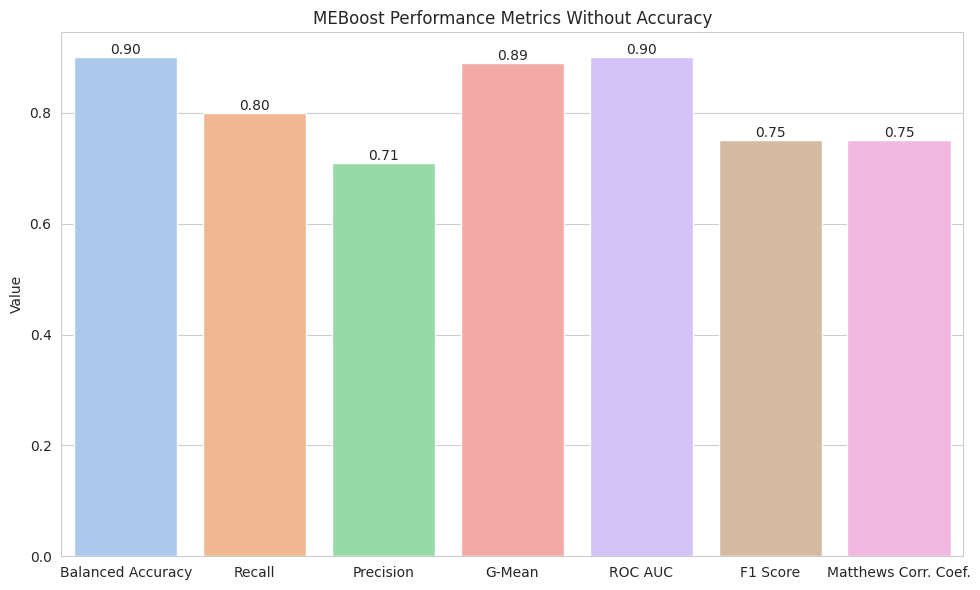

In [ ]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Data excluding 'Accuracy'
metrics = ['Balanced Accuracy', 'Recall', 'Precision', 'G-Mean', 'ROC AUC', 'F1 Score', 'Matthews Corr. Coef.']
values = [0.9, 0.8, 0.71, 0.89, 0.9, 0.75, 0.75]

# Convert data into a DataFrame
df = pd.DataFrame({'Metric': metrics, 'Value': values})

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Create a bar plot
plt.figure(figsize=(10, 6))
barplot = sns.barplot(x='Metric', y='Value', data=df, palette='pastel')

# Add value labels on top of the bars
for index, value in enumerate(values):
    plt.text(x=index, y=value, s=f"{value:.2f}", ha='center', va='bottom')

# Set the labels and title
plt.xlabel('')
plt.ylabel('Value')
plt.title('MEBoost Performance Metrics Without Accuracy')

# Remove the legend as it's unnecessary for a single dataset
plt.legend([],[], frameon=False)

# Adjust the layout and show the plot
plt.tight_layout()
plt.show()
